<font size='5'>Support Vector Machine</font>

It is a supervised learning algo used for both classification or regression problems. Mostly used in classification problem

<img src = 'SVM 1.jpg'>

Group A and Group B are linearly seperable , We can draw many lines between them to separate them. So inorder to find best line we use Support vector machine algo.

<img src='SVM 2.jpg'></img>

SVM find 2 lines line A is from how far can u move before u touch blue point and B is how far can u move before u encounter a black point

Margin is the distance between parallel lines draw with slope of line A or B. We draw 2 lines of slope A parallel to touch blue point and black point and check distance between those lines. Then we do same for line B and whichever line has higher margin it is choosen to represent the model.

<img src='SVM 3.jpg'></img>

Points closest to best line are known as support vectors

There are situations in which drawing a line is not enough.As some points of blue are on red side and red are on blue side. So whenever a point crosses over it calculates penalty rate.

<img src='SVM 4.jpg'></img>

we can either max(margin) or min(1/margin)

min((1/margin) +  $\lambda$ penalty) -> goal of SVM

One of the common penalty used is hinge loss

hinge loss is the distance between cross over margin and crossover points.

<font size='4' >Non linear classification SVM

<img src='SVM 5.jpg'>

in graph above we try to find the distance of red and blue points from center, let x axis be x1 feature and y axis be x2 feature.<br><br>
red points will definitely be closer i.e less dist from center than blue points.
<br><br>
so we define one more feature x3 - dist from center and remake the graph in 3D plane as we now have 3 features

<img src='SVM 6.jpg'><br>
<img src='SVM 7.jpg'><br><hr>
<img src='SVM 8.jpg'><br>
<img src='SVM 9.jpg'><br>
<img src='SVM 10.jpg'><br><hr>

Now after transformation we can apply SMV linear classfication model and make a hyper plane separating red and blue points.

SMV algo use a set of mathematical functions that are defined as kernel. <br>
The function of kernel is to take data as input and transform it into required form.<br>

In [1]:
from pyforest import *

In [2]:
df = pd.read_csv("Datasets\letter-recognition.csv")
df.head()

<IPython.core.display.Javascript object>

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


<font size='5'>Split Data


In [3]:
X = np.array(df)[:,1:16]
y = np.array(df.letter)[:]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
X

array([[2, 8, 3, ..., 0, 8, 0],
       [5, 12, 3, ..., 2, 8, 4],
       [4, 11, 6, ..., 3, 7, 3],
       ...,
       [6, 9, 6, ..., 2, 12, 2],
       [2, 3, 4, ..., 1, 9, 5],
       [4, 9, 6, ..., 2, 7, 2]], dtype=object)

In [5]:
y


array(['T', 'I', 'D', ..., 'T', 'S', 'A'], dtype=object)

In [8]:
X.shape

(20000, 15)

In [9]:
X_train = X[0:16000,:]
X_test = X[16001:,:]
y_train = y[0:16000]
y_test = y[16001:]

<font size='5'>Build SVM Model

In [10]:
from sklearn import svm

In [12]:
model = svm.SVC(C=3)

C is penalty of wrong classification. It tells algo how much you care about missclassified points. A high value of C tells algo that you care more about classifying all of the training points correctly.

In [13]:
model.fit(X_train, y_train)

SVC(C=3)

In [14]:
y_pred = model.predict(X_test)

In [15]:
y_pred

array(['N', 'V', 'I', ..., 'T', 'S', 'A'], dtype=object)

In [16]:
model.score(X_test, y_test)

0.927231807951988

In [17]:
y_grid = (np.column_stack([y_test, y_pred]))

<IPython.core.display.Javascript object>

In [18]:
y_grid

array([['N', 'N'],
       ['V', 'V'],
       ['I', 'I'],
       ...,
       ['T', 'T'],
       ['S', 'S'],
       ['A', 'A']], dtype=object)

In [19]:
import string 
lab = list(string.ascii_uppercase[0:26])
plab = ["Predicted "+s for s in lab]

In [20]:
cm = metrics.confusion_matrix(y_test, y_pred, labels= lab)

df_cm = pd.DataFrame(cm, index = [i for i in lab],
                        columns = [i for i in plab])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

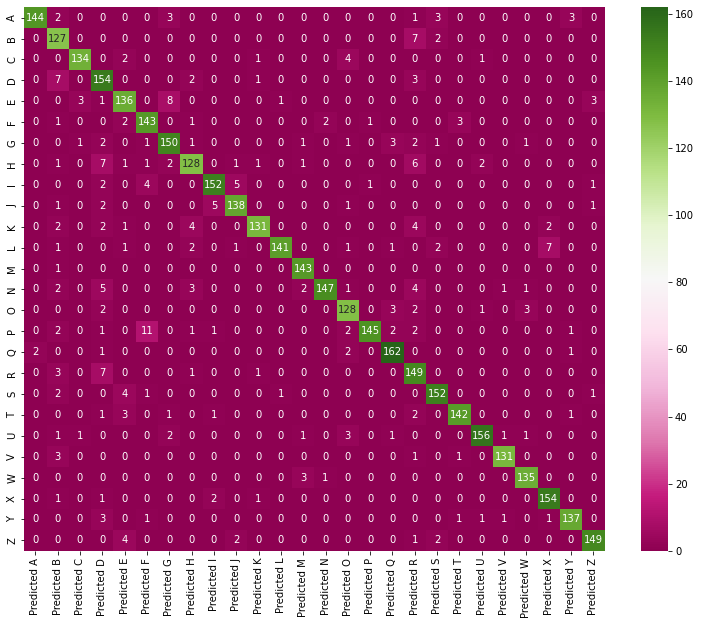

In [21]:
plt.figure(figsize = (13,10))
sns.heatmap(df_cm, annot=True, fmt='g', cmap ='PiYG')
plt.show()